In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [2]:
import pandas as pd

transactions = pd.read_csv("datasets/creditcard.csv")
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
transactions["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [22]:
from sklearn.utils import resample
df_nonfraud = transactions[(transactions['Class']==0)] 
df_fraud = transactions[(transactions['Class']==1)] 
df_fraud_resample = resample(df_fraud, 
                                 replace=True,    # sample with replacement
                                 n_samples= 284315, # to match majority class
                                 random_state=42)  # reproducible results
df_transactions = pd.concat([df_fraud_resample, df_nonfraud])

In [24]:
df_transactions["Class"].value_counts()

Class
1    284315
0    284315
Name: count, dtype: int64

In [26]:
df_transactions.shape

(568630, 31)

In [28]:
df_transactions['Class'].describe()

count    568630.0
mean          0.5
std           0.5
min           0.0
25%           0.0
50%           0.5
75%           1.0
max           1.0
Name: Class, dtype: float64

In [36]:
scale_data  = df_transactions.loc[:,'V1':'V28']

In [37]:
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
variable_summary_index = scale_data.index


In [38]:
scale_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
33276,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,...,3.025261,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593
239499,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,-4.485483,...,1.490329,0.532145,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588
154720,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,-6.864164,...,1.525732,-0.064780,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184
142557,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,-0.713474,...,-1.140376,0.634184,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594
41395,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,-0.688721,-0.108006,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834


In [39]:
variable_pca = PCA().fit(scale_data)

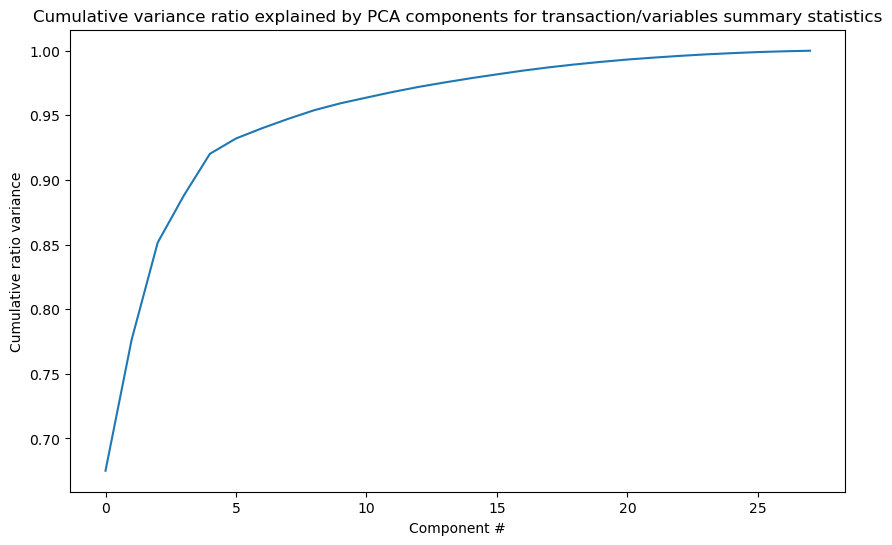

In [40]:
plt.subplots(figsize=(10, 6))
plt.plot(variable_pca.explained_variance_ratio_.cumsum())
plt.xlabel("Component #")
plt.ylabel("Cumulative ratio variance")
plt.title('Cumulative variance ratio explained by PCA components for transaction/variables summary statistics');

In [43]:
df_transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33276,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1
239499,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1
154720,102676.0,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,...,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,119.74,1
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
41395,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1


In [44]:
df = df_transactions[['Time','V1','V2','V3','V4','V5','Amount','Class']]

In [45]:
df.head()

,Time,V1,V2,V3,V4,V5,Amount,Class
33276,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,12.31,1
239499,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,50.00,1
154720,102676.0,-5.552122,5.678134,-9.775528,8.416295,-4.409844,119.74,1
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,354.33,1
41395,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,1.00,1


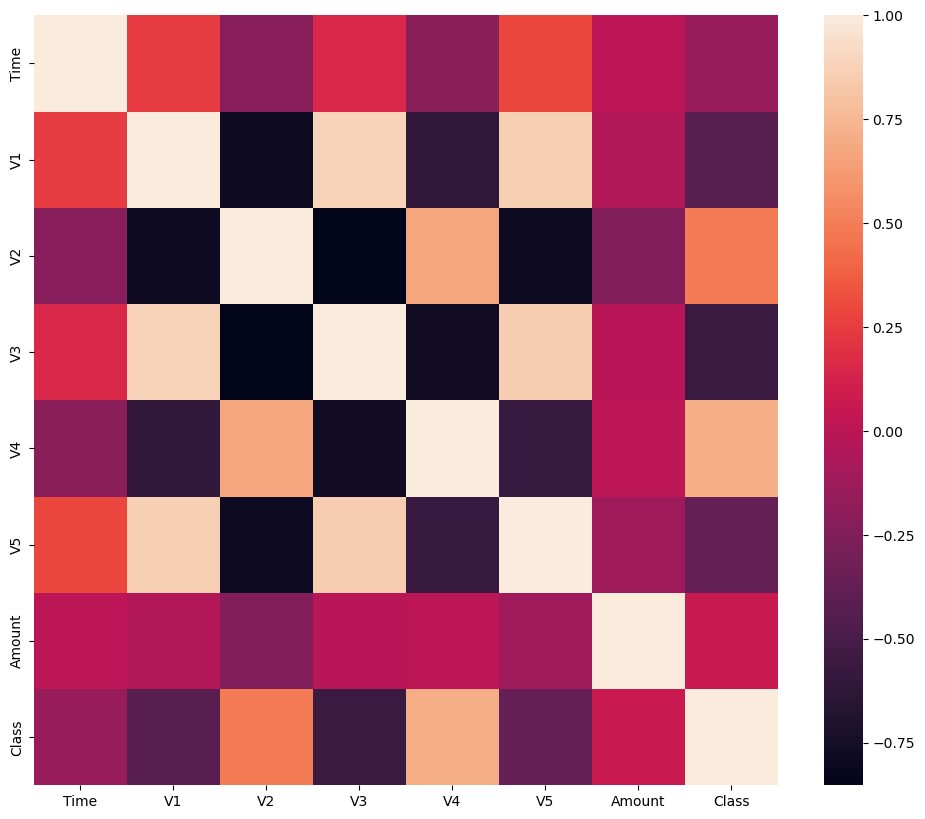

In [51]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True));

In [56]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Class', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='Fraud or not')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

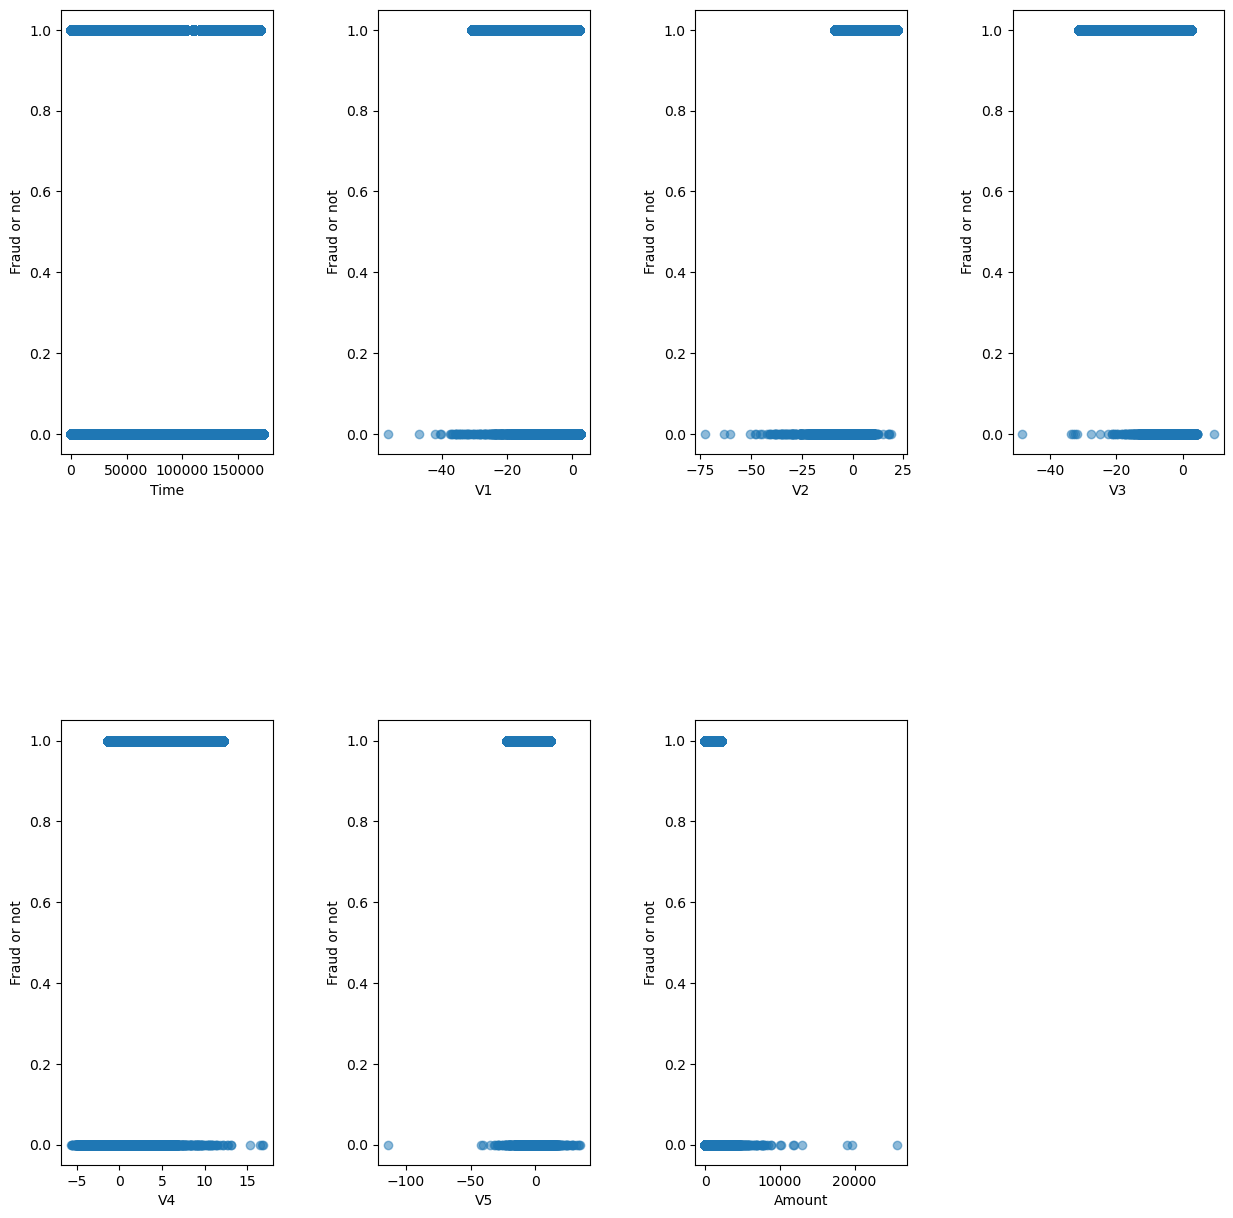

In [58]:
features = [col for col in df.columns if col not in ['Class']]
scatterplots(features, ncol=4, figsize=(15, 15))